In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label','Alcohol','Maric Acid']


In [ ]:
df

,Class label,Alcohol,Maric Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

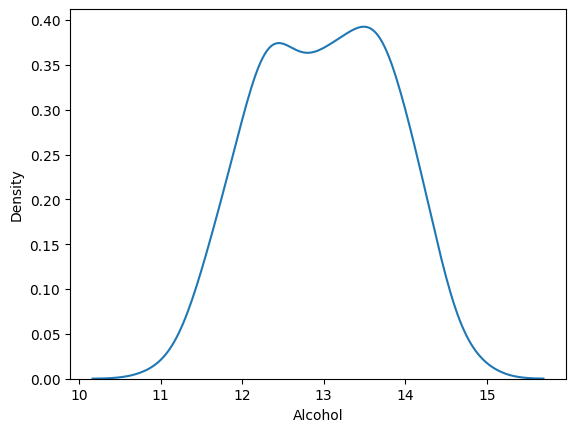

In [ ]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Alcohol', ylabel='Maric Acid'>

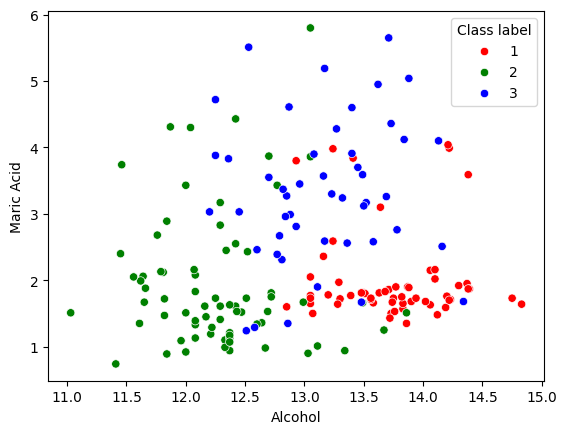

In [ ]:
color_dict={1:'red',2:'green',3:'blue'}
sns.scatterplot(x='Alcohol',y='Maric Acid',data=df,hue='Class label',palette=color_dict)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,y_train,X_test,y_test=train_test_split(df.drop('Class label',axis=1),df['Class label'],test_size=0.3,random_state=0)

In [ ]:
X_train.shape,X_test.shape

((124, 2), (124,))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Store original column names before transformation
original_columns = X_train.columns

# Apply scaling
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame with original column names
X_train = pd.DataFrame(X_train_scaled, columns=original_columns)
X_test = pd.DataFrame(X_test_scaled, columns=original_columns)

In [ ]:
np.round(X_train.describe(),1)

,Alcohol,Maric Acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


<Axes: title={'center': 'After Scaled training data'}, ylabel='Density'>

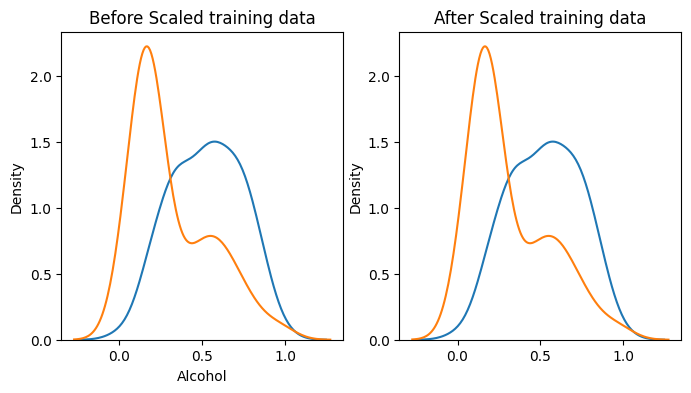

In [ ]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(8,4))

ax1.set_title('Before Scaled training data')
sns.kdeplot(X_train['Alcohol'],ax=ax1)
sns.kdeplot(X_train['Maric Acid'],ax=ax1)

ax2.set_title('After Scaled training data')
sns.kdeplot(X_train_scaled[:,0],ax=ax2)
sns.kdeplot(X_train_scaled[:,1],ax=ax2)